# Imports

In [1]:
import pandas as pd # dataframes
from sklearn.ensemble import IsolationForest # anomaly detection
from sklearn.decomposition import PCA # primary component analysis
import matplotlib.pyplot as plt # plots
import seaborn as sns # advanced plots

# Background
## Principal Component Analysis
Principal component analysis (PCA) is technique used to decrease dimensionality of data in statistics and machine-learning. In the process, it tries to maintain the original variability as best as possible.

A PCA:
1. Requires **normally-distributed numerical** data.
2. Utilizes feature correlations and is therefore **sensitive to outliers and feature scales**. Features should therefore be standardized to zero mean and unit variance.

# Preprocess the Data

## Reading The Data

In [2]:
data = pd.read_csv('./data/hcvdat11_Anomaly.csv', )

## Missing Data
Are there missing values in the dataset?

In [3]:
data.isnull().values.any()

False

In [4]:
data.isna().values.any()

False

## Inspecting The Dataframe

In [5]:
data.head(1)

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


## Dropping Columns
Drop the malformatted index-column at the beginning.

In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

Principal Component Analysis (PCA) does not work well with categorical variables.

One-Hot-Encoding could enable PCA for e.g. binary variables but could also introduce errors.

Therefore, drop the column 'Sex':

In [7]:
data.drop(columns=['Sex'], inplace=True)
data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
95,40,45.0,74.2,20.9,29.1,12.0,9.10,6.29,92.0,24.1,74.1
96,40,39.1,66.5,33.3,32.9,14.8,7.87,4.91,88.0,18.5,68.8
97,40,45.1,63.4,39.6,31.4,19.7,11.31,4.74,91.0,18.2,81.1
98,40,45.4,52.9,41.3,26.2,10.6,10.27,6.85,82.0,40.2,76.6


## Analyze Feature Distributions

In [8]:
def plot_feature_distribution(df: pd.DataFrame, n_rows: int, n_cols: int, figsize: tuple[float, float], suptitle: str) -> None:
    """ Plots a histplot including distribution for each column of a given dataframe

    Disables additional subplots

    Args:
        df (pd.DataFrame): the dataframe containing the columns of interest
        n_rows (int): number of rows for plt.subplots
        n_cols (int): number of columns for plt.subplots
        figsize (tuple[float, float]): (width, height) of each figure 
        suptitle (str): title above all subplots; argument for plt.suptitle()

    Returns:
        None: Renders the plot without returning a value
    """
    # create subplots based on the function arguments
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize, constrained_layout=True, sharey=True)

    # plot each col onto one ax
    for col, ax in zip(df.columns, axes.flat):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col)

    # disable leftover axes
    for ax in axes.flat[df.columns.size:]:
        ax.set_axis_off()

    # above all subplots
    plt.suptitle(suptitle)

    #plt.ion()

    # render the plots
    plt.show()

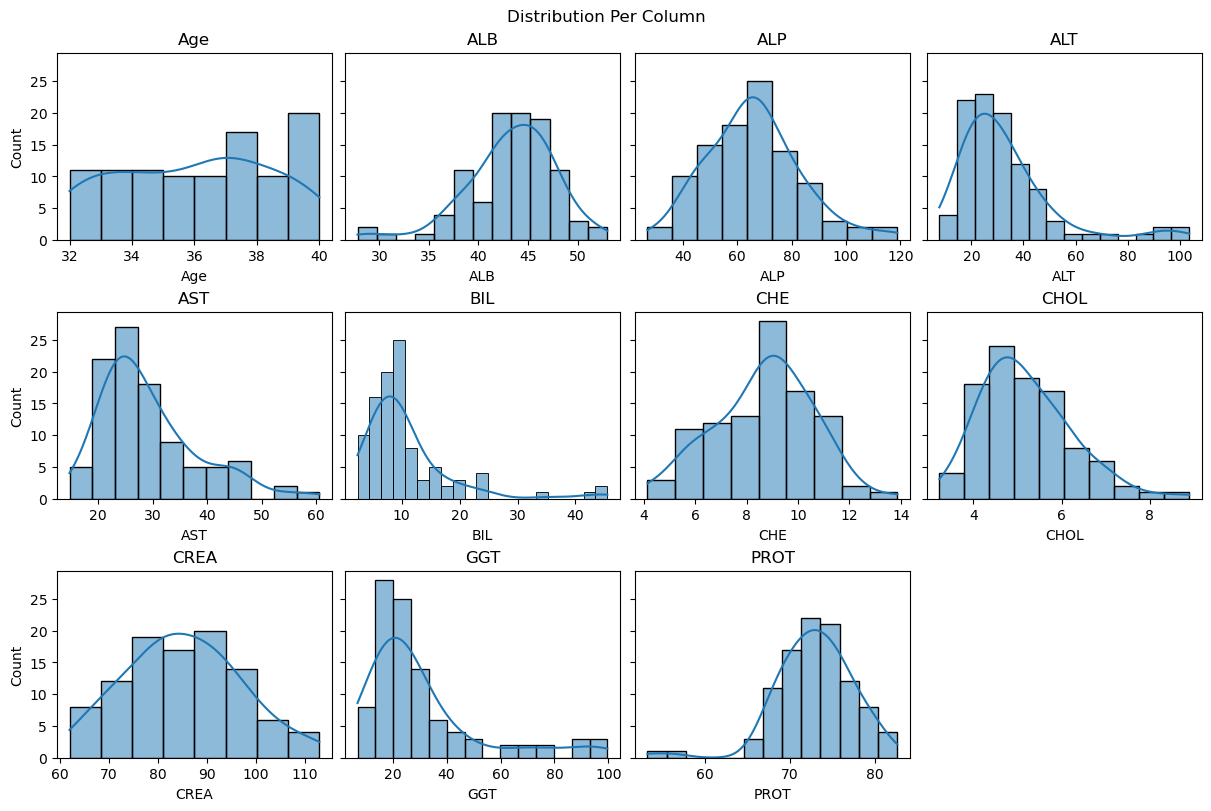

In [9]:
# TODO: Make interactive using plotly subplots
plot_feature_distribution(df=data, n_rows=3, n_cols=4, figsize=(12,8), suptitle='Distribution Per Column')

### Discussion
Most features (ALB, ALT, AST, BIL, CHOL, GGT and PROT) roughly follow normal distributions with outliers. KREA, CHE and ALP are normally distributed without outliers. Age alone is not normally distributed. Therefore, after standardization to control for outliers, the data is suitable for pca.

In [7]:
# TODO: Either standardize or remove outliers before PCA as outliers obscure the variance which is used during pca

# Perform A PCA
The very purpose of principal component analysis is to reduce the number of dimensions in data. This is usually desired to make data more computationally effective and easier to interpret for humans.

To choose an optimal number of principal components, fit an estimator for a range of possible ```N_COMPONENTS``` and choose the one which yields the best metrics such as accuracy or others.

In [8]:
# set the number of principal components here
N_COMPONENTS = 6

pca = PCA(n_components=N_COMPONENTS)

In [11]:
data_reduced = pca.fit_transform(X=data)

Principal components are sorted by the degree to which they explain the target's ration (highest to lowest).

Therefore plot the first two primary components:

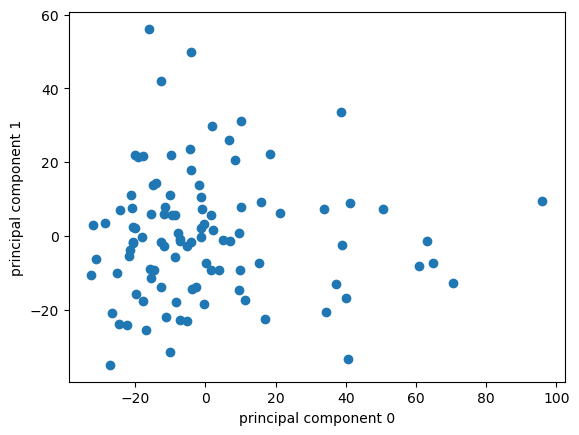

In [15]:
plt.scatter(data_reduced[:,0], data_reduced[:,1])
plt.xlabel(f'principal component 0')
plt.ylabel(f'principal component 1')
plt.show()

In [ ]:
# TODO: Include Scree Plot

In [ ]:
# TODO: Include Loading Plot

# Build an Anomaly Detection Model
On the [site on anomaly detection](https://scikit-learn.org/stable/modules/outlier_detection.html) on scikit-learn, the two algorithms isolation forest and local outlier factor score the best.

Use the Isolation Forest here because it provides decision boundaries.

In [10]:
# TODO: Tweak parameters so that not all instances are categorized the same way
clf = IsolationForest(max_samples=2, random_state=42)
clf.fit(X=pca.components_)

IsolationForest(max_samples=2, random_state=42)